# Simple example of a Decision Tree classifier

## Load dataset

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
# Print data set
print("iris data set instances")
X = iris.data
print(X[:5])


print("iris data set target")
y = iris.target
print(y[:5])

iris data set instances
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris data set target
[0 0 0 0 0]


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


## Train Tree

In [28]:
# Hyper parameter max depth
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

## Visualize results

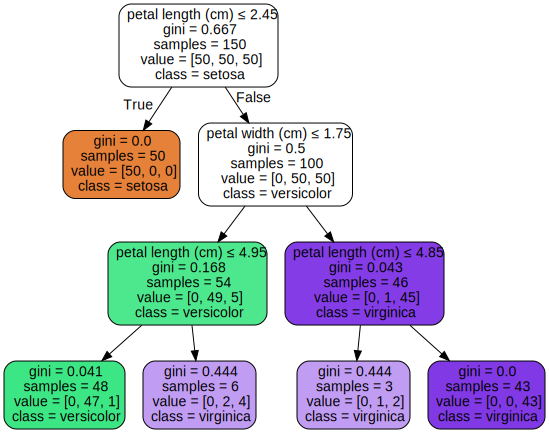

In [29]:
from sklearn import tree
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(tree_clf, out_file=None,
                           feature_names=iris.feature_names[:],
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot)
graph


In [30]:
# Make prediction

print("""  class 0 is Iris Setosa
  class 1 is Iris Versicolor
  class 2 is Iris Virginica
  """)

probs = tree_clf.predict_proba([[5, 1.5, 1.3, 0.3]])
print("probability of class for query",[[5, 1.5, 1.3, 0.3]],probs)

pred =  tree_clf.predict([[5, 1.5, 1.3, 0.3]])
print("prediction of class for query",[[5, 1.5, 1.3, 0.3]],pred)


  class 0 is Iris Setosa
  class 1 is Iris Versicolor
  class 2 is Iris Virginica
  
probability of class for query [[5, 1.5, 1.3, 0.3]] [[1. 0. 0.]]
prediction of class for query [[5, 1.5, 1.3, 0.3]] [0]


## Evaluation

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
y_pred = tree_clf.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



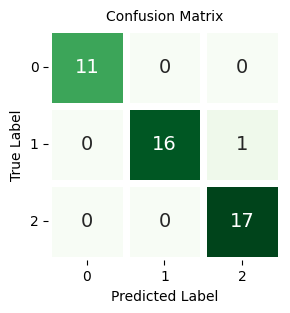

In [34]:
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1","2"], index= ["0","1","2"], data= cm )

f,ax = plt.subplots(figsize=(3,3))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()

